IMPORTING NEEDED PYTOHN LIBRARIES

In [ ]:
import numpy as np
import pandas as pd

READING THE CSV FILE

In [ ]:
df = pd.read_csv('/content/final_dataset.csv')
df.head()

,Unnamed: 0,Country,Player,Team,Base price,Winning bid,Year
0,0,Guyana,Christopher Barnwell,Royal Challengers Bangalore,30.5,30.5,2013
1,1,South Africa,Johan Botha,Delhi Daredevils,183.0,274.5,2013
2,2,Australia,Daniel Christian,Royal Challengers Bangalore,61.0,61.0,2013
3,3,Australia,Michael Clarke,Pune Warriors India,244.0,244.0,2013
4,4,Australia,Nathan Coulter-Nile,Mumbai Indians,61.0,274.5,2013


Shape of the dataset

In [ ]:
df.shape

(1052, 7)

REMOVING UNWANTED COLUMN

In [ ]:
df1 = df.drop('Unnamed: 0', axis=1)
df1.head()

,Country,Player,Team,Base price,Winning bid,Year
0,Guyana,Christopher Barnwell,Royal Challengers Bangalore,30.5,30.5,2013
1,South Africa,Johan Botha,Delhi Daredevils,183.0,274.5,2013
2,Australia,Daniel Christian,Royal Challengers Bangalore,61.0,61.0,2013
3,Australia,Michael Clarke,Pune Warriors India,244.0,244.0,2013
4,Australia,Nathan Coulter-Nile,Mumbai Indians,61.0,274.5,2013


SHAPE OF NEW DATAFRAME

In [ ]:
df1.shape

(1052, 6)

FETCHING INFORMATION FROM DATAFRAME

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      1052 non-null   object 
 1   Player       1052 non-null   object 
 2   Team         1052 non-null   object 
 3   Base price   1052 non-null   float64
 4   Winning bid  1052 non-null   object 
 5   Year         1052 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 49.4+ KB


SORTING OUR DATA ACCORDING TO PLAYERS FOR BETTER ANALYSIS

In [ ]:
df2 = df1.sort_values(by = 'Player')
df2

,Country,Player,Team,Base price,Winning bid,Year
307,Australia,Aaron Finch,Gujarat Lions,100.0,100,2016
434,Australia,Aaron Finch,Kings XI Punjab,150.0,620,2018
53,Australia,Aaron Finch,Sunrisers Hyderabad,100.0,400,2014
222,Australia,Aaron Finch,Mumbai Indians,100.0,320,2015
650,Australia,Aaron Finch,Royal Challengers Bangalore,100.0,440,2020
...,...,...,...,...,...,...
466,India,Yuzvendra Chahal,Royal Challengers Bangalore,200.0,600,2018
158,India,Yuzvendra Chahal,Royal Challengers Bangalore,10.0,10,2014
201,India,Zaheer Khan,Delhi Daredevils,100.0,400,2015
48,India,Zaheer Khan,Mumbai Indians,100.0,260,2014


CHECKING IF THERE IS ANY NULL VALUE

In [ ]:
df2.isnull().sum()

,0
Country,0
Player,0
Team,0
Base price,0
Winning bid,0
Year,0


CONVERTING SOME NUMERICAL DATA TO NUMERIC VALUE WHICH ARE STRING

In [ ]:
df2['Winning bid'] = pd.to_numeric(df2['Winning bid'], errors='coerce')
df2.dtypes

,0
Country,object
Player,object
Team,object
Base price,float64
Winning bid,float64
Year,int64


In [ ]:
df2.head()

,Country,Player,Team,Base price,Winning bid,Year
307,Australia,Aaron Finch,Gujarat Lions,100.0,100.0,2016
434,Australia,Aaron Finch,Kings XI Punjab,150.0,620.0,2018
53,Australia,Aaron Finch,Sunrisers Hyderabad,100.0,400.0,2014
222,Australia,Aaron Finch,Mumbai Indians,100.0,320.0,2015
650,Australia,Aaron Finch,Royal Challengers Bangalore,100.0,440.0,2020


LET'S SEE CHANGE IN BASE PRICE OF PLAYERS OVER YEARS

In [ ]:
player_data1 = df2.groupby(['Player', 'Year'])['Base price'].sum()
player_data1

Player              Year
Aaron Finch         2014    100.0
                    2015    100.0
                    2016    100.0
                    2018    150.0
                    2020    100.0
                            ...  
Yuzvendra Chahal    2018    200.0
                    2022    200.0
Zaheer Khan         2014    100.0
                    2015    100.0
Zahir Khan Pakteen  2018     20.0
Name: Base price, Length: 1048, dtype: float64

<Axes: xlabel='Year'>

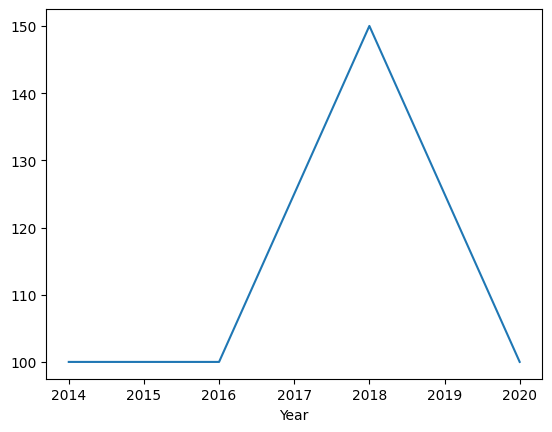

In [ ]:
player_data1['Aaron Finch'].plot()

LET'S SEE TOTAL AMOUNT SPENT BY EACH TEAM IN EACH YEAR IF THEY BUY EACH PLAYER AT BASE PRICE

In [ ]:
team_data1= df2.groupby(['Team', 'Year'])['Base price'].sum()
team_data1

Team                 Year
Chennai Super Kings  2013     170.8
                     2014    1090.0
                     2015     410.0
                     2018    1985.0
                     2019      70.0
                              ...  
Sunrisers Hyderabad  2019     350.0
                     2020     350.0
                     2021     370.0
                     2022    1265.0
                     2023     840.0
Name: Base price, Length: 94, dtype: float64

<Axes: xlabel='Year'>

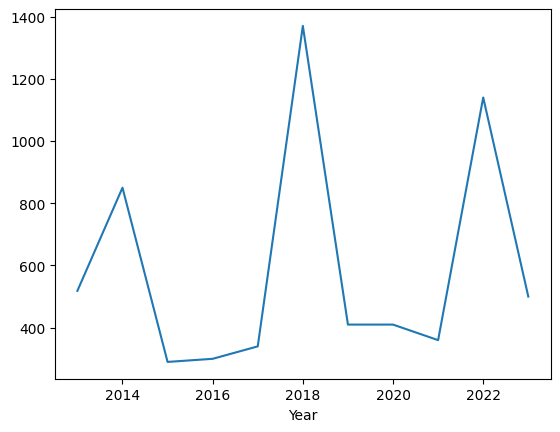

In [ ]:
team_data1['Mumbai Indians'].plot()

NEXT 2 CELLS/CODE WILL SHOW WHAT WAS DIERENCE BETWEEN BASE & BID PRICE IN TERMS OF PLAYERS & TEAM

In [ ]:
player_data2 = df2.groupby(['Player', 'Year'])['Winning bid'].sum()
player_data2

Player              Year
Aaron Finch         2014    400.0
                    2015    320.0
                    2016    100.0
                    2018    620.0
                    2020    440.0
                            ...  
Yuzvendra Chahal    2018    600.0
                    2022    650.0
Zaheer Khan         2014    260.0
                    2015    400.0
Zahir Khan Pakteen  2018     60.0
Name: Winning bid, Length: 1048, dtype: float64

<Axes: xlabel='Year'>

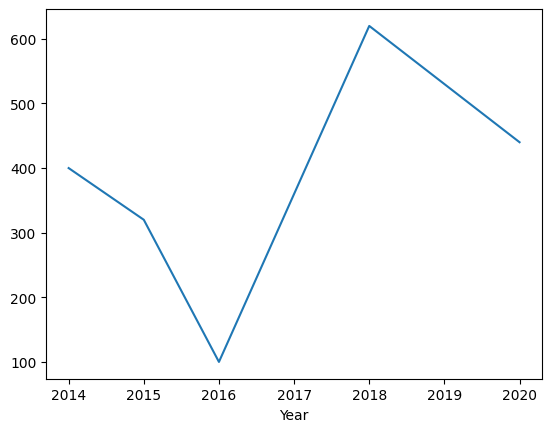

In [ ]:
player_data2['Aaron Finch'].plot()

In [ ]:
team_data2 = df2.groupby(['Team','Year'])['Winning bid'].sum()
team_data2

Team                 Year
Chennai Super Kings  2013     783.85
                     2014    2080.00
                     2015     410.00
                     2018    4050.00
                     2019     520.00
                              ...   
Sunrisers Hyderabad  2019     440.00
                     2020     690.00
                     2021     380.00
                     2022    6790.00
                     2023    2245.00
Name: Winning bid, Length: 94, dtype: float64

<Axes: xlabel='Year'>

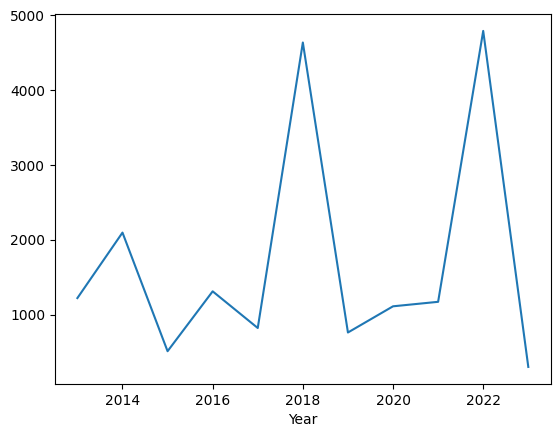

In [ ]:
team_data2['Mumbai Indians'].plot()

WE CAN ALSO SEE YEARLY DETAILS OF TEAM IN BAR GRAPH

<Axes: xlabel='Year'>

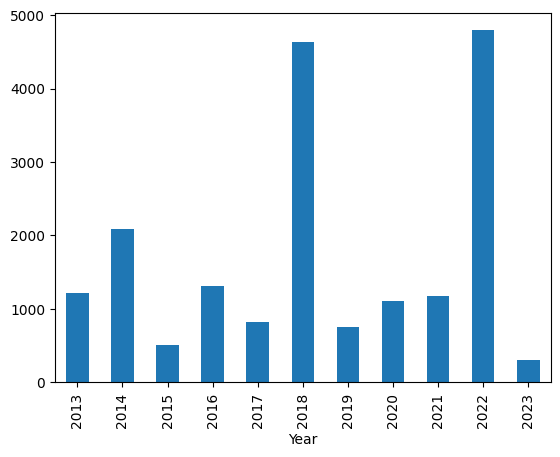

In [ ]:
team_data2['Mumbai Indians'].plot.bar()


PLOTTING EARING OF EACH COUNTRY

In [ ]:
country_data = df2.groupby(['Country','Year'])['Winning bid'].sum()
country_data

Country               Year
 Afghanistan          2022     180.0
                      2023      50.0
 Australia            2022    4790.0
                      2023     375.0
 Bangladesh           2022     200.0
                               ...  
Trinidad and Tobago   2017      80.0
                      2018    1560.0
                      2019     420.0
United Arab Emirates  2017      10.0
Zimbabwe              2014      30.0
Name: Winning bid, Length: 107, dtype: float64

<Axes: ylabel='Country,Year'>

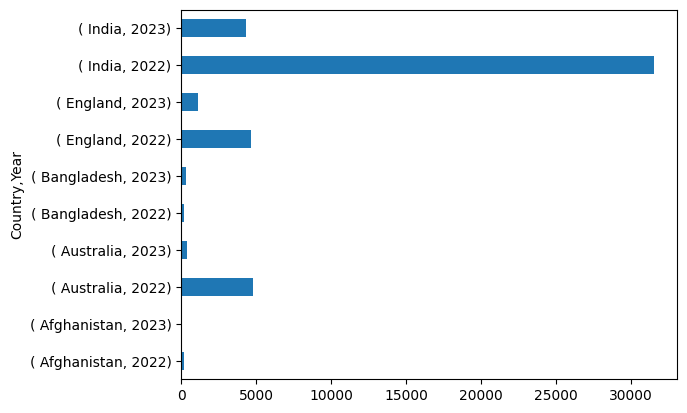

In [ ]:
country_data[:10].plot.barh()

APPLYING ML TECHNIQUES

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import OrdinalEncoder
import xgboost as xgb

In [ ]:
oe = OrdinalEncoder()
df2['Country'] = df2['Country'].astype('category')
X = pd.DataFrame(oe.fit_transform(df2[['Country', 'Team']]))

In [ ]:
X.rename(columns={0:'Country', 1:'Team'}, inplace=True)

In [ ]:
Regress = df2.copy()

In [ ]:
Regress['Country'] = X['Country']
Regress['Team'] = X['Team']

In [ ]:
Regress

,Country,Player,Team,Base price,Winning bid,Year
307,18.0,Aaron Finch,16.0,100.0,100.0,2016
434,4.0,Aaron Finch,1.0,150.0,620.0,2018
53,13.0,Aaron Finch,1.0,100.0,400.0,2014
222,23.0,Aaron Finch,15.0,100.0,320.0,2015
650,18.0,Aaron Finch,9.0,100.0,440.0,2020
...,...,...,...,...,...,...
466,18.0,Yuzvendra Chahal,16.0,200.0,600.0,2018
158,13.0,Yuzvendra Chahal,15.0,10.0,10.0,2014
201,16.0,Zaheer Khan,7.0,100.0,400.0,2015
48,18.0,Zaheer Khan,4.0,100.0,260.0,2014


In [ ]:
X = Regress[['Country','Team','Year','Base price']]
y = Regress['Winning bid']

In [ ]:
X_train = X[X['Year'] < 2022] #splitting columns based on year
X_test = X[X['Year'] >= 2022]
y_train = y[X['Year'] < 2022]
y_test = y[X['Year'] >= 2022]
X_train = X_train.drop('Year', axis=1) #Dropping the column since it is used for splitting
X_test = X_test.drop('Year', axis=1)

In [ ]:
X_train

,Country,Team,Base price
307,18.0,16.0,100.0
434,4.0,1.0,150.0
53,13.0,1.0,100.0
222,23.0,15.0,100.0
650,18.0,9.0,100.0
...,...,...,...
466,18.0,16.0,200.0
158,13.0,15.0,10.0
201,16.0,7.0,100.0
48,18.0,4.0,100.0


In [ ]:
print(X_train.loc[y_train.isnull()]) #It shows that there are 2 null rows in y_train and so we'll remove only hat 2 rows

    Country  Team  Base price
47     18.0   4.0       200.0
41     18.0   3.0       200.0


In [ ]:
y_train.fillna(y_train.mean(), inplace=True) #Filling null values with mean()
y_test.fillna(y_test.mean(), inplace=True)

REGRESSION

In [ ]:
model = RandomForestRegressor(n_estimators=100) #We are ready to train the model since there are no null values
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
error1 = mean_absolute_percentage_error(y_test, y_pred)
error1

1.9005223572963506

CLASSIFICATION

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [ ]:
LE = LabelEncoder()

In [ ]:
z = df['Team']
z = LE.fit_transform(z)

In [ ]:
z_train = z[X['Year'] < 2022]
z_test = z[X['Year'] >= 2022]

In [ ]:
model2 = LinearRegression()

In [ ]:
model2.fit(X_train,z_train)

LinearRegression()

In [ ]:
z_pred = model2.predict(X_test)

In [ ]:
error2 = mean_absolute_percentage_error(z_pred,z_test)
error2

0.5354041514012967